#COEN 240
## HW 2 Problem 2


### Data Upload
Upload the att_faces_10.zip file in the same directory as this notebook. Run the code cell below if on Google Colab.  

In [0]:
from google.colab import files
uploaded = files.upload()

!unzip att_faces_10.zip
!rm att_faces_10.zip

### Preprocessing

* Assign train and test images according to the HW specifications.
* Go through the images in each subject directory and convert each image to a vector of length D = 112 × 92 = 10304.
* Stack 6 training images of all 10 subjects to form a matrix of size 10304 × 60.

In [57]:
import os

import cv2
import numpy as np

train_ims = [1, 3, 4, 5, 7, 9]
test_ims = [2, 6, 8, 10]

x_train = []
y_train = []
x_test = []
y_test = []

for i in range(1, 11):  # 10 subjects
  for j in range(1, 11):  # 10 images per subject
      # read the images as grayscale
      label = 's' + str(i)
      im_path = os.path.join('att_faces_10', label, str(j) + '.pgm')
      im = cv2.imread(im_path, cv2.IMREAD_GRAYSCALE)
      im_vec = im.ravel()  # reshape to a vector of length 10304
      
      if j in train_ims:
        x_train.append(im_vec)
        y_train.append(label)
      else:
        x_test.append(im_vec)
        y_test.append(label)
      
# stack 6 training images of all 10 subjects
X_train = np.transpose(np.array(x_train))  

# zero center
mu_train = (np.dot(X_train, np.identity(X_train.shape[1]))) / X_train.shape[1]
X_train = X_train - mu_train
                   
print('X_train = ')
print(X_train)
print('Shape of X_train = {}'.format(X_train.shape))

# do same processing for test
X_test = np.transpose(np.array(x_test))
mu_test = (np.dot(X_test, np.identity(X_test.shape[1]))) / X_test.shape[1]
X_test = X_test - mu_test

print('X_test = ')
print(X_test)
print('Shape of X_test = {}'.format(X_test.shape))

X_train = 
[[ 47.2         38.35        61.95       ... 130.78333333 131.76666667
  133.73333333]
 [ 48.18333333  43.26666667  52.11666667 ... 132.75       135.7
  133.73333333]
 [ 44.25        52.11666667  34.41666667 ... 134.71666667 133.73333333
  133.73333333]
 ...
 [ 46.21666667  28.51666667  40.31666667 ...  15.73333333  54.08333333
   18.68333333]
 [ 45.23333333  25.56666667   9.83333333 ...  18.68333333  77.68333333
   19.66666667]
 [ 45.23333333  28.51666667  23.6        ...  16.71666667  79.65
   20.65      ]]
Shape of X_train = (10304, 60)
X_test = 
[[ 58.5    41.925  42.9   ... 129.675 131.625 129.675]
 [ 58.5    48.75   41.925 ... 131.625 129.675 125.775]
 [ 60.45   39.975  31.2   ... 131.625 132.6   129.675]
 ...
 [ 31.2   154.05   41.925 ...  17.55   17.55   14.625]
 [ 33.15  149.175  41.925 ...  16.575  20.475  28.275]
 [ 33.15  164.775  36.075 ...  14.625  23.4    25.35 ]]
Shape of X_test = (10304, 40)


### PCA

* Apply PCA to matrix `X_train` with K = 1, 2, 3, 6, 10, 20, 30, and 50.
* Project the face images to the rank-K subspace (i.e. project the face images onto the K principal components).

### Classification
* Apply the nearest-neighbor classifier in the subspace.

In [58]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

K = [1, 2, 3, 6, 10, 20, 30, 50]
im_height = 112
im_width = 92

accuracy_rates = []  # stores the accuracy rates for the different K values


for k in K:
  #################
  # PCA
  #################
  pca = PCA(n_components=k)
  pca.fit(X_train.T)
  # print('Rank-{}'.format(k) + ' principal components = ')
  # print(pca.components_)

  # project the data on the principal components
  X_train_pca = pca.transform(X_train.T)
  X_test_pca = pca.transform(X_test.T)

  #################
  # CLASSIFICATION
  #################
  neigh = KNeighborsClassifier(n_neighbors=3)
  neigh.fit(X_train_pca, y_train)

  y_pred = neigh.predict(X_test_pca)

  correct_preds = accuracy_score(y_test, y_pred, normalize = False)
  accuracy_rate = accuracy_score(y_test, y_pred)

  print('K = {}'.format(k))
  print('True = {}'.format(y_test))
  print('Predicted = {}'.format(y_pred))
  print('Total number of correct classifications = {}'.format(correct_preds))
  print('Accuracy rate = {}'.format(accuracy_rate))

  accuracy_rates.append(accuracy_rate)

K = 1
True = ['s1', 's1', 's1', 's1', 's2', 's2', 's2', 's2', 's3', 's3', 's3', 's3', 's4', 's4', 's4', 's4', 's5', 's5', 's5', 's5', 's6', 's6', 's6', 's6', 's7', 's7', 's7', 's7', 's8', 's8', 's8', 's8', 's9', 's9', 's9', 's9', 's10', 's10', 's10', 's10']
Predicted = ['s1' 's1' 's1' 's1' 's2' 's5' 's2' 's2' 's4' 's3' 's8' 's3' 's8' 's5'
 's4' 's8' 's5' 's5' 's5' 's2' 's6' 's6' 's6' 's6' 's8' 's8' 's6' 's4'
 's8' 's4' 's4' 's4' 's9' 's9' 's6' 's6' 's10' 's10' 's10' 's6']
Total number of correct classifications = 23
Accuracy rate = 0.575
K = 2
True = ['s1', 's1', 's1', 's1', 's2', 's2', 's2', 's2', 's3', 's3', 's3', 's3', 's4', 's4', 's4', 's4', 's5', 's5', 's5', 's5', 's6', 's6', 's6', 's6', 's7', 's7', 's7', 's7', 's8', 's8', 's8', 's8', 's9', 's9', 's9', 's9', 's10', 's10', 's10', 's10']
Predicted = ['s1' 's1' 's1' 's1' 's2' 's3' 's2' 's2' 's3' 's3' 's3' 's3' 's4' 's5'
 's4' 's7' 's5' 's5' 's5' 's5' 's6' 's6' 's6' 's6' 's3' 's3' 's7' 's3'
 's8' 's8' 's8' 's8' 's9' 's9' 's9' 's7' 's1

### Plot
* Plot the recognition accuracy rate versus different K values.

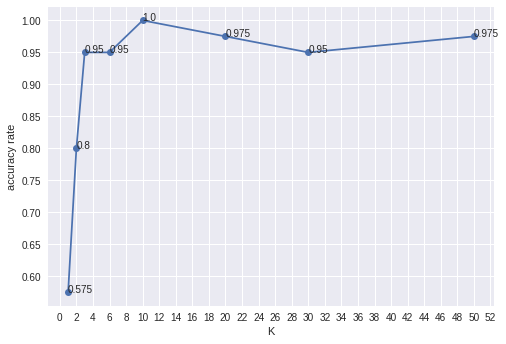

In [59]:
from matplotlib import pyplot as plt
plt.style.use('seaborn')

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(K, accuracy_rates, linestyle='-', marker='o')
for i, j in zip(K, accuracy_rates):
    ax.annotate(str(round(j, 3)), xy=(i, j))
plt.xlabel('K')
plt.ylabel('accuracy rate')
plt.locator_params(axis='y', nbins=10)
plt.locator_params(axis='x', nbins=50)
plt.show()